# LEO to GEO Transfer Calculations

In [1]:
const μ = 398600
const r_e = 6378
const g₀ = 9.80665;

In [9]:
v_r = sqrt(μ / (r_e + 150))

r_a = r_e + 35785
r_p = r_e + 150

a_transfer = 0.5 * (r_a + r_p)
v_transfer = sqrt(2*μ) * sqrt(1/r_p - 1/(2 * a_transfer))
v_transfer_apo = sqrt(2*μ) * sqrt(1/r_a - 1/(2 * a_transfer))
v_circ_geo = sqrt(μ / (r_a))

Δv = (v_transfer - v_r) + (v_circ_geo - v_transfer_apo)

3.946363153941772

In [10]:
curie_isp = 320
kickstage_wet_mass = 85 # from d2l announcement
payload_mass = 25

total_mass = kickstage_wet_mass + payload_mass

mass_prop = total_mass - total_mass / exp((Δv * 1000) / (curie_isp * g₀))

78.7216211417799

Required mass ratio would be a better measure, allows for arbitrary masses to be calculated

In [11]:
mass_ratio = exp((Δv * 1000) / (curie_isp * g₀))

3.516806305678836

# Lunar Fly-By Considerations

In [13]:
using DifferentialEquations, Plots, PlotThemes
include("../git-projects/scripts/scripts/orbital_dynamics.jl")

diffeq_three_body_cr (generic function with 1 method)

In [21]:
params = [
    6.6759e-20,
    5.974e24,
    73.48e21,
    384400
]

4-element Vector{Float64}:
      6.6759e-20
      5.974e24
      7.348e22
 384400.0

In [22]:
function circle(x, y, r)
    θ = LinRange(0, 2*π, 500)
    x .+ r*sin.(θ), y .+ r*cos.(θ)
end

circle (generic function with 1 method)

In [89]:
init_orbit = [
   -4671 - 6378 - 150,
    0,
    0,
    0,
    v_r,
    0
]

tspan_orbit = (0.0, 88 * 60)

sol_orbit = diffeq_three_body_cr(init_orbit, tspan_orbit, params, solver=Vern7(), reltol=1e-8, abstol=1e-8);

In [104]:
init_transfer = [
    -4671 - 6378 - 150,
    0,
    0,
    0,
    v_r + Δv/1.17,
    0
]

tspan_transfer = (0.0, 1.7 * 24 * 60 * 60)

sol_transfer = diffeq_three_body_cr(init_transfer, tspan_transfer, params, solver=Vern7(), reltol=1e-8, abstol=1e-8);

In [107]:
Δv, Δv/1.17

(3.946363153941772, 3.3729599606339935)

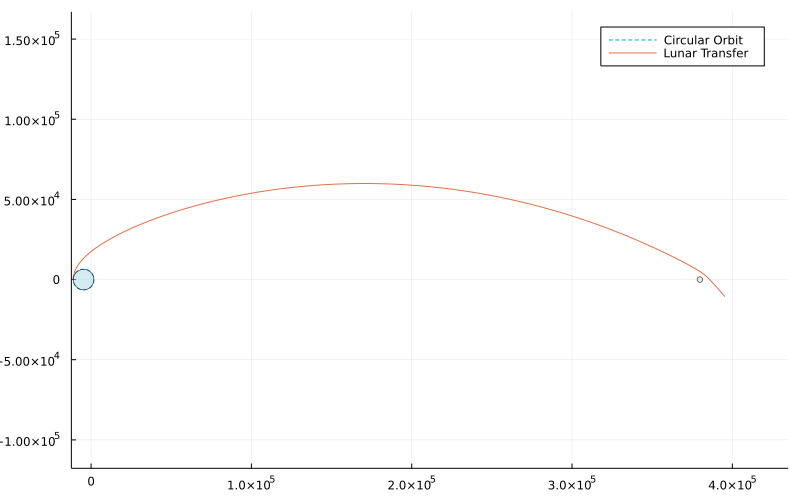

In [111]:
plot(
    sol_orbit, 
    vars=(1,2),
    size=(800,500),
    dpi=230,
    aspect_ratio=:equal,
    label="Circular Orbit",
    linestyle=:dash,
    xlim=(-2e4, 4e5)
)

plot!(sol_transfer, vars=(1,2), label="Lunar Transfer")

plot!(circle(-4671, 0, 6378), seriestype = [:shape,], lw=0.5, c = :lightblue, fillalpha=0.5, label="")
plot!(circle(-4671 + 384400, 0, 1737), seriestype = [:shape,], lw=0.5, c = :lightgray, fillalpha=0.5, label="")

# Example Mission Analysis

Example mission:
- Starting at 250 km circular orbit, carrying two payloads
- Deploy satellite 1 at 310 km circular orbit
- Deploy satellite 2 at 350 km circular orbit

In [5]:
# start -> sat 1 deployment
v_start = sqrt(μ / (r_e + 250))

r_a = r_e + 310
r_p = r_e + 250

a_transfer = 0.5 * (r_a + r_p)

v_transfer = sqrt(2*μ) * sqrt(1/r_p - 1/(2 * a_transfer))
v_transfer_apo = sqrt(2*μ) * sqrt(1/r_a - 1/(2 * a_transfer))
v_circ_geo = sqrt(μ / r_a)

Δv = ((v_transfer - v_start) + (v_circ_geo - v_transfer_apo)) * 1000

34.864024831183116

In [16]:
# sat 1 deployment -> start
v_start = sqrt(μ / (r_e + 310))

r_a = r_e + 310
r_p = r_e + 250

a_transfer = 0.5 * (r_a + r_p)

v_transfer_start = sqrt(2*μ) * sqrt(1/r_a - 1/(2 * a_transfer))
v_transfer_end = sqrt(2*μ) * sqrt(1/r_p - 1/(2 * a_transfer))
v_circ = sqrt(μ / r_p)

Δv = ((v_start - v_transfer_start) + (v_transfer_end - v_circ)) * 1000

34.864024831183116

In [ ]:
# sat 2 deployment -> deorbit
